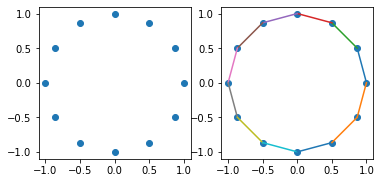

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from persistence import * 
from apparent_pairs import * 
theta = np.linspace(0, 2*np.pi, 12, endpoint=False)
circle = np.c_[np.cos(theta), np.sin(theta)]
r = np.min(pdist(circle))*0.55
K = rips(circle, r, d=1)
fig, axs = plt.subplots(1, 2)
axs[0].scatter(*circle.T)
for u, v in K['edges']: axs[1].plot(*circle[(u,v),:].T)
axs[1].scatter(*circle.T)
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

In [33]:
## Parameterization of the circle defined on [0, \infty)
def circle_family(n: int):
  theta = np.linspace(0, 2*np.pi, 12, endpoint=False)
  unit_circle = np.c_[np.cos(theta), np.sin(theta)]
  def circle(t: float):
    t = np.max([t, 0])
    return(unit_circle @ np.diag([t, t]))
  return(circle)

In [42]:
from apparent_pairs import *

def weighted_H1(K: List, t: float):
  D = boundary_matrix(K, p=1)
  ew = pdist(f(t))[rank_combs(K['edges'], n=len(K['vertices']), k=2)]
  D.data = np.sign(D.data) * (2.0 - np.repeat(ew, 2))
  return(D)

def boundary_jacobian(K, f, t: float, h: float = 100*np.sqrt(np.finfo(float).eps)):
  D = boundary_matrix(K, p=1)
  edge_ind = rank_combs(K['edges'], n=len(K['vertices']), k=2)
  ew_p = np.maximum(2.0 - pdist(f(t + h))[edge_ind], 0.0)
  ew_m = np.maximum(2.0 - pdist(f(t - h))[edge_ind], 0.0)
  ew_p = np.sign(D.data) * np.repeat(ew_p, 2)
  ew_m = np.sign(D.data) * np.repeat(ew_m, 2)
  D.data = (ew_p - ew_m)/(2*h)
  return(D)

In [49]:
## Show 1-parameter family persistent Betti numbers vs relaxation

f = circle_family(16)
f(1.0)
# boundary_jacobian(K, f, 2.0).A

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 8.66025404e-01,  5.00000000e-01],
       [ 5.00000000e-01,  8.66025404e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-5.00000000e-01,  8.66025404e-01],
       [-8.66025404e-01,  5.00000000e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-8.66025404e-01, -5.00000000e-01],
       [-5.00000000e-01, -8.66025404e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 5.00000000e-01, -8.66025404e-01],
       [ 8.66025404e-01, -5.00000000e-01]])

In [ ]:
# np.linalg.svd() + Jacobian 


In [ ]:
# D1, ew = weighted_H1(X, K, b, sorted=True)
# D2, tw = weighted_H2(X, K, d, sorted=True)
# R1, R2, V1, V2 = reduction_pHcol(D1, D2, clearing=True)